In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import entropy
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

import socket, struct

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import class_weight
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from scipy.spatial.distance import jensenshannon
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


2024-08-01 00:21:16.464869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 00:21:16.622555: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 00:21:16.623399: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 00:21:16.853060: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-01 00:21:18.945428: W tensorflow/compiler/tf

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal
import numpy as np


In [5]:
filepath = "1st.csv"
df = pd.read_csv(filepath, header=None)

In [6]:
columns = [
    'duration', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat',
    'std_fiat', 'std_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat',
    'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active',
    'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1'
]
df.columns = columns

# Inspect the data
df.head()

,duration,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,std_fiat,std_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,76,-1,-1,-1,-1,0.0,0.0,0.0,0.0,26315.789474,...,0.0,-1,0.0,-1,0.0,-1,0.0,-1,0.0,CHAT
1,54,-1,-1,-1,-1,0.0,0.0,0.0,0.0,37037.037037,...,0.0,-1,0.0,-1,0.0,-1,0.0,-1,0.0,CHAT
2,67,-1,-1,-1,-1,0.0,0.0,0.0,0.0,29850.746269,...,0.0,-1,0.0,-1,0.0,-1,0.0,-1,0.0,CHAT
3,75,-1,-1,-1,-1,0.0,0.0,0.0,0.0,26666.666667,...,0.0,-1,0.0,-1,0.0,-1,0.0,-1,0.0,CHAT
4,14512571,14512571,-1,14512571,-1,14500000.0,0.0,0.0,0.0,0.206717,...,10300000.0,14512571,14500000.0,14512571,0.0,14512502,14500000.0,14512502,0.0,CHAT


In [7]:
X = df[df.columns[:-1]]
y = df['class1']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2,random_state=42)


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12412, 23)
(3103, 23)
(12412,)
(3103,)


In [9]:
label_encoder = LabelEncoder()
label_encoder.fit(y)

# Get the mapping of labels to encoded values
label_to_encoded = {label: idx for idx, label in enumerate(label_encoder.classes_)}
encoded_to_label = {idx: label for idx, label in enumerate(label_encoder.classes_)}

print("Label to Encoded Mapping:", label_to_encoded)
print("Encoded to Label Mapping:", encoded_to_label)

Label to Encoded Mapping: {'BROWSING': 0, 'CHAT': 1, 'FT': 2, 'MAIL': 3, 'P2P': 4, 'STREAMING': 5, 'VOIP': 6}
Encoded to Label Mapping: {0: 'BROWSING', 1: 'CHAT', 2: 'FT', 3: 'MAIL', 4: 'P2P', 5: 'STREAMING', 6: 'VOIP'}


Random Forest Accuracy: 0.87
Confusion Matrix:
[[943  23   7   0   9   3   5]
 [ 44 182  12  11  12   0   1]
 [ 26  17 329  20  53   5   5]
 [  7   5   9 212  10   1   0]
 [ 12   8   4   0 289   1   9]
 [ 11   1   2   2  10  67   0]
 [ 16   5  12   0  20   0 683]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       990
           1       0.76      0.69      0.72       262
           2       0.88      0.72      0.79       455
           3       0.87      0.87      0.87       244
           4       0.72      0.89      0.80       323
           5       0.87      0.72      0.79        93
           6       0.97      0.93      0.95       736

    accuracy                           0.87      3103
   macro avg       0.85      0.83      0.83      3103
weighted avg       0.88      0.87      0.87      3103



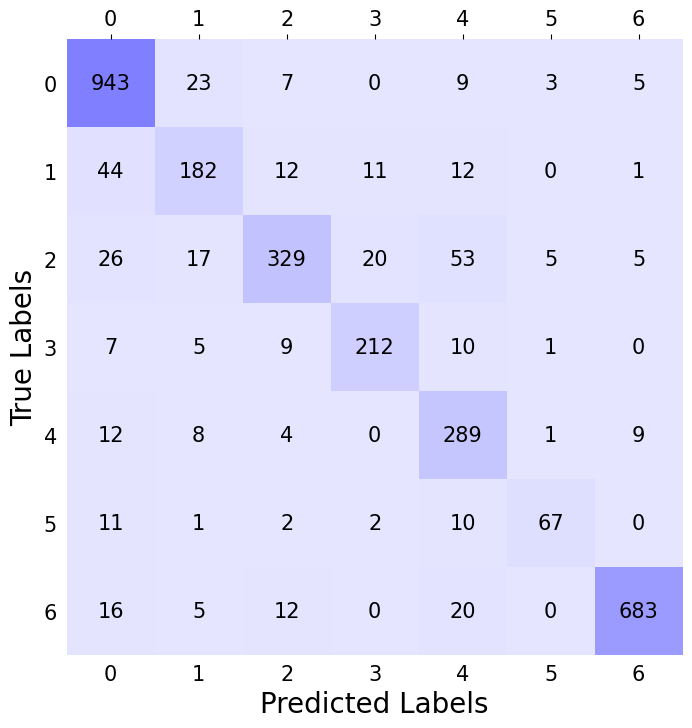

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train, X_test, y_test are already defined

# Train the RandomForest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Evaluate the RandomForest model
y_pred = rf_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print accuracy and confusion matrix
print(f'Random Forest Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Define a light blue colormap
colors = [(0.9, 0.9, 1), (0.5, 0.5, 1)]  # Light blue to blue
n_bins = 100  # Use 100 colors
cmap_name = 'light_blues'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(conf_matrix, cmap=cm)
# fig.colorbar(cax)

# Annotate the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=15, color='black')

# Set labels
ax.set_xlabel('Predicted Labels', fontsize=20)
ax.set_ylabel('True Labels', fontsize=20)
ax.set_xticks(np.arange(len(set(y_test))))
ax.set_yticks(np.arange(len(set(y_test))))
ax.set_xticklabels(np.arange(len(set(y_test))), fontsize=15)
ax.set_yticklabels(np.arange(len(set(y_test))), fontsize=15)

# Remove the ticks and the frame
ax.tick_params(left=False, bottom=False, labelleft=True, labelbottom=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove grid
ax.grid(False)

# Save the plot in .eps format
plt.savefig('1.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()

In [11]:

class BayesianLinear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        # Weight parameters
        self.weight_mu = nn.Parameter(torch.Tensor(out_features, in_features).uniform_(-0.2, 0.2))
        self.weight_rho = nn.Parameter(torch.Tensor(out_features, in_features).uniform_(-5, -4))

        # Bias parameters
        self.bias_mu = nn.Parameter(torch.Tensor(out_features).uniform_(-0.2, 0.2))
        self.bias_rho = nn.Parameter(torch.Tensor(out_features).uniform_(-5, -4))

    def forward(self, input):
        weight_sigma = torch.log1p(torch.exp(self.weight_rho))
        bias_sigma = torch.log1p(torch.exp(self.bias_rho))

        weight = Normal(self.weight_mu, weight_sigma).rsample()
        bias = Normal(self.bias_mu, bias_sigma).rsample()

        return F.linear(input, weight, bias)

class BayesianMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.hidden1 = BayesianLinear(input_size, hidden_size)
        self.hidden2 = BayesianLinear(hidden_size, hidden_size)
        self.out = BayesianLinear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        return self.out(x)

In [12]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

# Define constants
input_size = 23
hidden_size = 128  # Increased hidden size
num_classes = len(torch.unique(y_train_tensor))

In [13]:
model = BayesianMLP(input_size, hidden_size, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

num_epochs = 100
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model

Epoch [10/100], Loss: 0.9212
Epoch [20/100], Loss: 0.8047
Epoch [30/100], Loss: 0.7265
Epoch [40/100], Loss: 0.7230
Epoch [50/100], Loss: 0.7287
Epoch [60/100], Loss: 0.6764
Epoch [70/100], Loss: 0.7011
Epoch [80/100], Loss: 0.7039
Epoch [90/100], Loss: 0.6931
Epoch [100/100], Loss: 0.7108


In [14]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test_tensor.size(0)
    correct += (predicted == y_test_tensor).sum().item()
    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Accuracy on the test set: 71.12%


In [15]:
newval=X_test_tensor[0]

In [16]:
newval_out=y_test_tensor[0]

In [17]:
model.eval()

# Select the input value you want to predict
newval = X_test_tensor[0].unsqueeze(0)  # Add a batch dimension

# Predict the output
with torch.no_grad():
    output = model(newval)
    prediction = F.softmax(output, dim=1)
    predicted_class = torch.argmax(prediction).item()

# Print the prediction and predicted class
print(f"Output probabilities: {prediction}")
print(f"Predicted class: {predicted_class}")

Output probabilities: tensor([[9.5068e-01, 1.4756e-05, 4.8913e-03, 6.8128e-06, 1.5855e-02, 6.7328e-04,
         2.7884e-02]])
Predicted class: 0


In [18]:
model.eval()

# Select the input value you want to predict
newval = X_test_tensor[0].unsqueeze(0)  # Add a batch dimension

# Predict the output
with torch.no_grad():
    output = model(newval)
    prediction = F.softmax(output, dim=1)
    predicted_class = torch.argmax(prediction).item()

# Print the prediction and predicted class
print(f"Output probabilities: {prediction}")
print(f"Predicted class: {predicted_class}")

Output probabilities: tensor([[9.6799e-01, 1.2762e-05, 3.1360e-03, 7.2901e-06, 9.0183e-03, 7.8025e-04,
         1.9058e-02]])
Predicted class: 0


In [19]:
def instability_check(model, x, num_samples=2, threshold=0.1):
    model.eval()
    outputs = []

    for _ in range(num_samples):
        with torch.no_grad():
            outputs.append(F.softmax(model(x), dim=1))

    outputs = torch.stack(outputs)
    mean_output = outputs.mean(dim=0)

    js_divergence = 0.5 * F.kl_div(outputs[0].log(), mean_output, reduction='batchmean') + \
                    0.5 * F.kl_div(outputs[1].log(), mean_output, reduction='batchmean')

    instability = torch.sqrt(js_divergence)

    return instability.item() > threshold

In [20]:
def familiarity_based_filtering(model, X, lambda_factor=1.0, beta_2=0.5):
    model.eval()
    familiarities = []

    for x in X:
        x = x.unsqueeze(0)

        # Compute confidence
        with torch.no_grad():
            output = model(x)
        confidence = F.softmax(output, dim=1).max().item()

        # Compute instability
        instability = instability_check(model, x, num_samples=2, threshold=1.0)  # We want the actual value, not boolean

        # Compute familiarity
        familiarity = (lambda_factor * (confidence - beta_2) - instability) / np.sqrt(lambda_factor**2 + 1)
        familiarities.append(familiarity)

    familiarities = np.array(familiarities)

    # Filter packets with negative familiarity scores
    unknown_indices = np.where(familiarities < 0)[0]

    return unknown_indices, familiarities

In [21]:
def update_model(model, X_new, y_new, num_epochs=10, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        output = model(X_new)
        loss = criterion(output, y_new)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    return model

In [22]:
unknown_indices, familiarities = familiarity_based_filtering(model, X_train_tensor)
if len(unknown_indices) > 0:
    X_new = X_train_tensor[unknown_indices]
    y_new = y_train_tensor[unknown_indices]

    # Update X_train and y_train
    X_train = torch.cat([X_train_tensor, X_new], dim=0).numpy()
    y_train = torch.cat([y_train_tensor, y_new], dim=0).numpy()

    # Re-create tensors for updated X_train and y_train
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)

    # Update and re-train model
    model = BayesianMLP(input_size, hidden_size, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        for i in range(0, len(X_train_tensor), batch_size):
            batch_X = X_train_tensor[i:i+batch_size]
            batch_y = y_train_tensor[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Re-evaluate Bayesian model after update
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test_tensor.size(0)
    correct += (predicted == y_test_tensor).sum().item()
    # print(f'Updated Bayesian Model Accuracy: {100 * correct / total:.2f}%')

Epoch [10/100], Loss: 1.5808
Epoch [20/100], Loss: 1.5467
Epoch [30/100], Loss: 1.5168
Epoch [40/100], Loss: 1.5892
Epoch [50/100], Loss: 1.6464
Epoch [60/100], Loss: 1.6226
Epoch [70/100], Loss: 1.3742
Epoch [80/100], Loss: 1.5987
Epoch [90/100], Loss: 1.3770
Epoch [100/100], Loss: 1.5015


Random Forest Accuracy: 0.87
Confusion Matrix:
[[938  25   8   0  10   4   5]
 [ 46 180  14  10  11   0   1]
 [ 29  14 330  20  52   5   5]
 [  7   5   8 214   9   1   0]
 [ 13   7   4   0 288   1  10]
 [ 12   1   2   2  10  66   0]
 [ 17   6  12   0  20   0 681]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       990
           1       0.76      0.69      0.72       262
           2       0.87      0.73      0.79       455
           3       0.87      0.88      0.87       244
           4       0.72      0.89      0.80       323
           5       0.86      0.71      0.78        93
           6       0.97      0.93      0.95       736

    accuracy                           0.87      3103
   macro avg       0.85      0.82      0.83      3103
weighted avg       0.87      0.87      0.87      3103



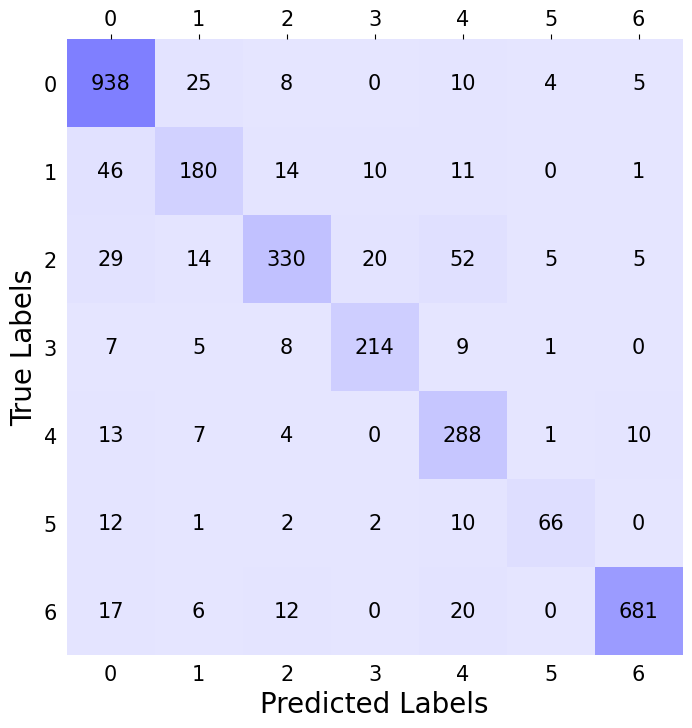

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Training the Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Evaluate the RandomForest model
y_pred = rf_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print accuracy and confusion matrix
print(f'Random Forest Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Define a light blue colormap
colors = [(0.9, 0.9, 1), (0.5, 0.5, 1)]  # Light blue to blue
n_bins = 100  # Use 100 colors
cmap_name = 'light_blues'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plotting the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(conf_matrix, cmap=cm)
# fig.colorbar(cax)

# Annotate the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=15, color='black')

# Set labels
ax.set_xlabel('Predicted Labels', fontsize=20)
ax.set_ylabel('True Labels', fontsize=20)
ax.set_xticks(np.arange(len(set(y_test))))
ax.set_yticks(np.arange(len(set(y_test))))
ax.set_xticklabels(np.arange(len(set(y_test))), fontsize=15)
ax.set_yticklabels(np.arange(len(set(y_test))), fontsize=15)

# Remove the ticks and the frame
ax.tick_params(left=False, bottom=False, labelleft=True, labelbottom=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove grid
ax.grid(False)

# Save the plot in .eps format
plt.savefig('1.eps', format='eps', bbox_inches='tight')

# Show the plot
plt.show()

Random Forest Accuracy: 0.87
Confusion Matrix:
[[938  25   8   0  10   4   5]
 [ 46 180  14  10  11   0   1]
 [ 29  14 330  20  52   5   5]
 [  7   5   8 214   9   1   0]
 [ 13   7   4   0 288   1  10]
 [ 12   1   2   2  10  66   0]
 [ 17   6  12   0  20   0 681]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       990
           1       0.76      0.69      0.72       262
           2       0.87      0.73      0.79       455
           3       0.87      0.88      0.87       244
           4       0.72      0.89      0.80       323
           5       0.86      0.71      0.78        93
           6       0.97      0.93      0.95       736

    accuracy                           0.87      3103
   macro avg       0.85      0.82      0.83      3103
weighted avg       0.87      0.87      0.87      3103



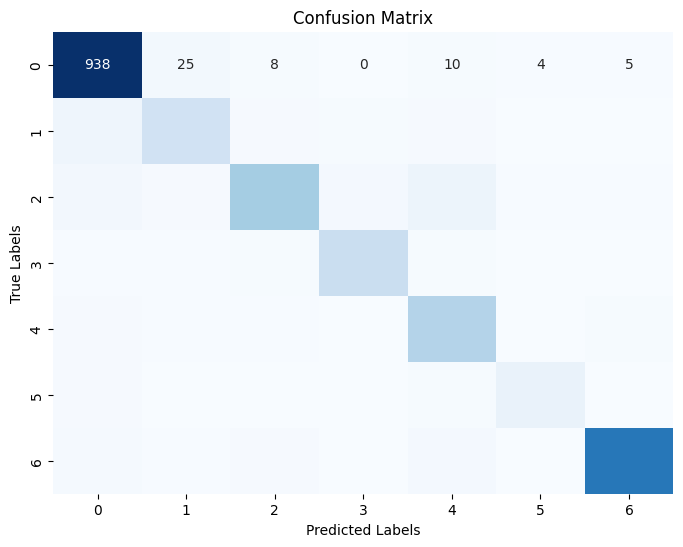

In [24]:


# Assuming rf_clf, X_test, and y_test are already defined and trained

# Make predictions
y_pred = rf_clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print accuracy and confusion matrix
print(f'Random Forest Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal
import matplotlib.pyplot as plt
import seaborn as sns

/home/rishul/.local/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/home/rishul/.local/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
/home/rishul/.local/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/home/rishul/.local/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
The PostScript backend does not su

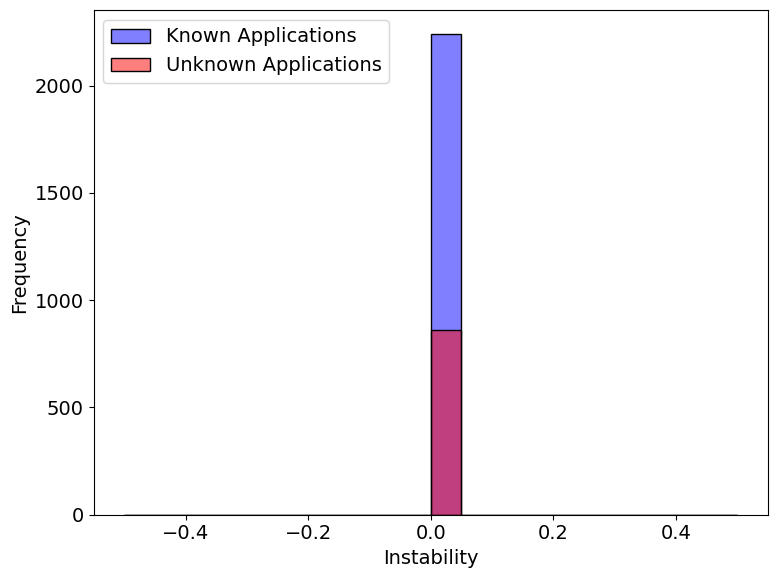

In [36]:
def compute_instability_confidence(model, x):
    model.eval()
    with torch.no_grad():
        output = model(x.unsqueeze(0))  # Assuming x is a single sample
        confidence = F.softmax(output, dim=1).max().item()
        instability = instability_check(model, x.unsqueeze(0))  # Assuming your instability_check function returns a value
    return instability, confidence

# Compute familiarity scores for test samples
unknown_indices, familiarities = familiarity_based_filtering(model, X_test_tensor)

# Compute instabilities for all test samples
instabilities = []
for i in range(len(X_test_tensor)):
    x = X_test_tensor[i]
    instability = compute_instability_confidence(model, x.unsqueeze(0))[0]
    instabilities.append(instability)

# Separate known and unknown instabilities based on familiarity
known_instabilities = [instabilities[i] for i in range(len(instabilities)) if i not in unknown_indices]
unknown_instabilities = [instabilities[i] for i in unknown_indices]

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 14})  # Adjust font size as needed

plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(known_instabilities, bins=20, kde=True, color='blue', label='Known Applications')
sns.histplot(unknown_instabilities, bins=20, kde=True, color='red', label='Unknown Applications')
plt.xlabel('Instability')
plt.ylabel('Frequency')
plt.legend(loc='upper left')  # Adjust the location as needed

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as an EPS file
plt.savefig('instability_plot.eps', format='eps')

plt.show()
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Example of placing the legend outside the plot

In [27]:
import seaborn as sns
from sklearn.metrics import classification_report


In [28]:
from sklearn.metrics import precision_recall_fscore_support

precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Micro-averaged metrics
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')

print('Macro-Averaged Metrics:')
print(f'Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1-score: {f1_macro:.2f}')

print('Micro-Averaged Metrics:')
print(f'Precision: {precision_micro:.2f}, Recall: {recall_micro:.2f}, F1-score: {f1_micro:.2f}')

Macro-Averaged Metrics:
Precision: 0.85, Recall: 0.82, F1-score: 0.83
Micro-Averaged Metrics:
Precision: 0.87, Recall: 0.87, F1-score: 0.87


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


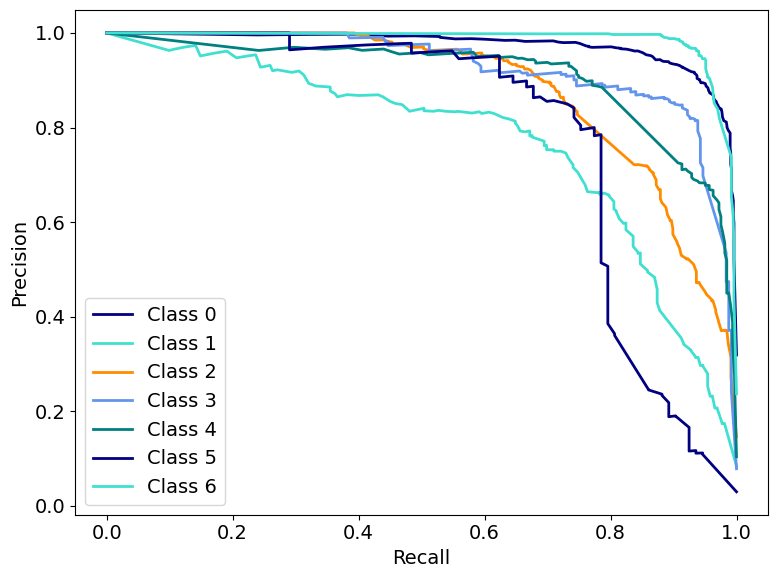

In [37]:
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming y_test and rf_clf are already defined and imported
# Binarize the labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute precision-recall curve for each class
precision = dict()
recall = dict()
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], rf_clf.predict_proba(X_test)[:, i])

# Set global font size
plt.rcParams.update({'font.size': 14})  # Adjust font size as needed

# Second Plot: Precision-Recall Curve
plt.figure(figsize=(8, 6))  # Set the same figure size
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as an EPS file
plt.savefig('precision_recall_curve.eps', format='eps')

plt.show()

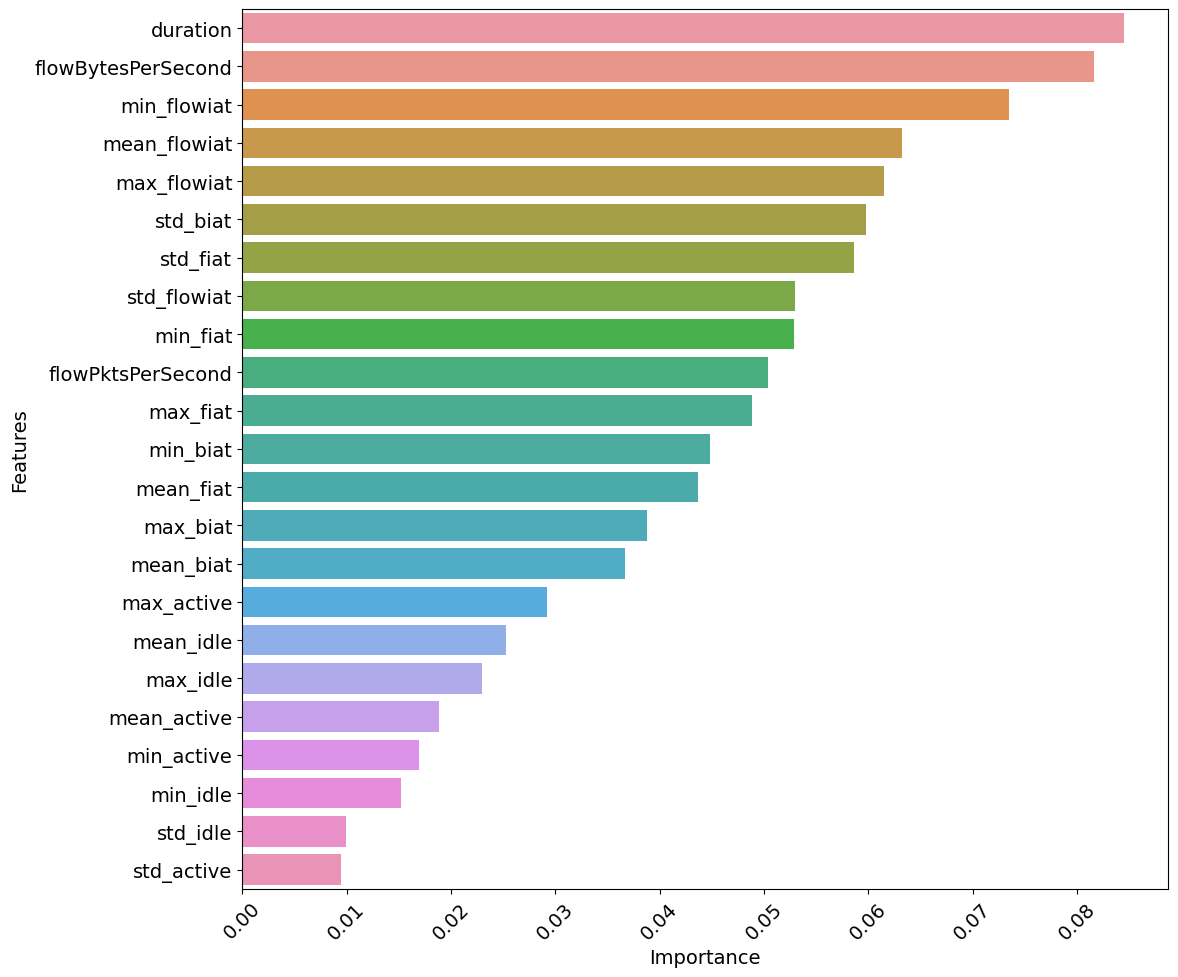

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf_clf is your trained Random Forest Classifier
feature_importances = rf_clf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Set global font size
plt.rcParams.update({'font.size': 14})  # Adjust font size as needed

# Plot feature importances
plt.figure(figsize=(12, 10))  # Increase figure size if necessary
sns.barplot(x=feature_importances[indices], y=feature_names[indices])
# plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit everything

# Save the figure as an EPS file with a bounding box
plt.savefig('feature_importance.eps', format='eps', bbox_inches='tight')

plt.show()

In [41]:
def calculate_familiarity(instability, confidence, lambda_val=1):
    return (lambda_val * (confidence - 0.5) - instability) / np.sqrt(lambda_val**2 + 1)

In [93]:
def plot_instability_over_time(model, X, time_slots):
    instabilities = [calculate_instability(model, X[i:i+100]) for i in range(0, len(X), 100)]
    
    # Adjust time_slots length to match instabilities length
    time_slots = time_slots[:len(instabilities)]
    
    plt.figure(figsize=(10, 5))
    plt.plot(time_slots, instabilities)
    plt.xlabel('Time Slot')
    plt.ylabel('Instability')
    plt.title('Instability Over Time')
    plt.show()

In [45]:
def plot_instability_vs_confidence(model, X_known, X_unknown):
    # Compute instability and confidence for known data
    instability_known = []
    confidence_known = []
    for x in X_known:
        inst, conf = compute_instability_confidence(model, x)
        instability_known.append(inst)
        confidence_known.append(conf)
    
    # Compute instability and confidence for unknown data
    instability_unknown = []
    confidence_unknown = []
    for x in X_unknown:
        inst, conf = compute_instability_confidence(model, x)
        instability_unknown.append(inst)
        confidence_unknown.append(conf)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(confidence_known, instability_known, label='Known', alpha=0.5)
    plt.scatter(confidence_unknown, instability_unknown, label='Unknown', alpha=0.5)
    plt.xlabel('Prediction Confidence')
    plt.ylabel('Prediction Instability')
    plt.title('Prediction Instability vs. Confidence')
    plt.legend()
    plt.show()

In [95]:
def plot_familiarity_histogram(model, X, lambda_vals=[0.5, 1, 2]):
    instability = np.array([calculate_instability(model, x.reshape(1, -1)) for x in X])
    confidence = calculate_confidence(model, X)
    
    plt.figure(figsize=(15, 5))
    for i, lambda_val in enumerate(lambda_vals):
        familiarity = calculate_familiarity(instability, confidence, lambda_val)
        plt.subplot(1, 3, i+1)
        plt.hist(familiarity[familiarity < 0], bins=50)
        plt.xlabel('Familiarity Score')
        plt.ylabel('Count')
        plt.title(f'λ = {lambda_val}')
    plt.tight_layout()
    plt.show()

In [96]:
def plot_tpr_and_filtered_vs_sensitivity(model, X_unknown, sensitivities):
    tpr_values = []
    filtered_counts = []
    
    for sensitivity in sensitivities:
        instability = np.array([calculate_instability(model, x.reshape(1, -1)) for x in X_unknown])
        confidence = calculate_confidence(model, X_unknown)
        familiarity = calculate_familiarity(instability, confidence)
        
        filtered = familiarity < sensitivity
        tpr = np.sum(filtered) / len(X_unknown)
        filtered_count = np.sum(filtered)
        
        tpr_values.append(tpr)
        filtered_counts.append(filtered_count)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(sensitivities, tpr_values)
    plt.xlabel('Sensitivity')
    plt.ylabel('True Positive Rate')
    plt.title('TPR vs. Sensitivity')
    
    plt.subplot(1, 2, 2)
    plt.plot(sensitivities, filtered_counts)
    plt.xlabel('Sensitivity')
    plt.ylabel('Number of Filtered Packets')
    plt.title('Filtered Packets vs. Sensitivity')
    
    plt.tight_layout()
    plt.show()

In [97]:
def plot_filtering_performance(model, X_unknown, sensitivities, gamma1=1, gamma2=1):
    performance_values = []
    
    for sensitivity in sensitivities:
        instability = np.array([calculate_instability(model, x.reshape(1, -1)) for x in X_unknown])
        confidence = calculate_confidence(model, X_unknown)
        familiarity = calculate_familiarity(instability, confidence)
        
        filtered = familiarity < sensitivity
        tpr = np.sum(filtered) / len(X_unknown)
        filtered_count = np.sum(filtered)
        
        performance = gamma1 * np.log(tpr) + gamma2 * np.log(filtered_count)
        performance_values.append(performance)
    
    plt.figure(figsize=(10, 5))
    plt.plot(sensitivities, performance_values)
    plt.xlabel('Sensitivity')
    plt.ylabel('Filtering Performance')
    plt.title('Filtering Performance vs. Sensitivity')
    plt.show()

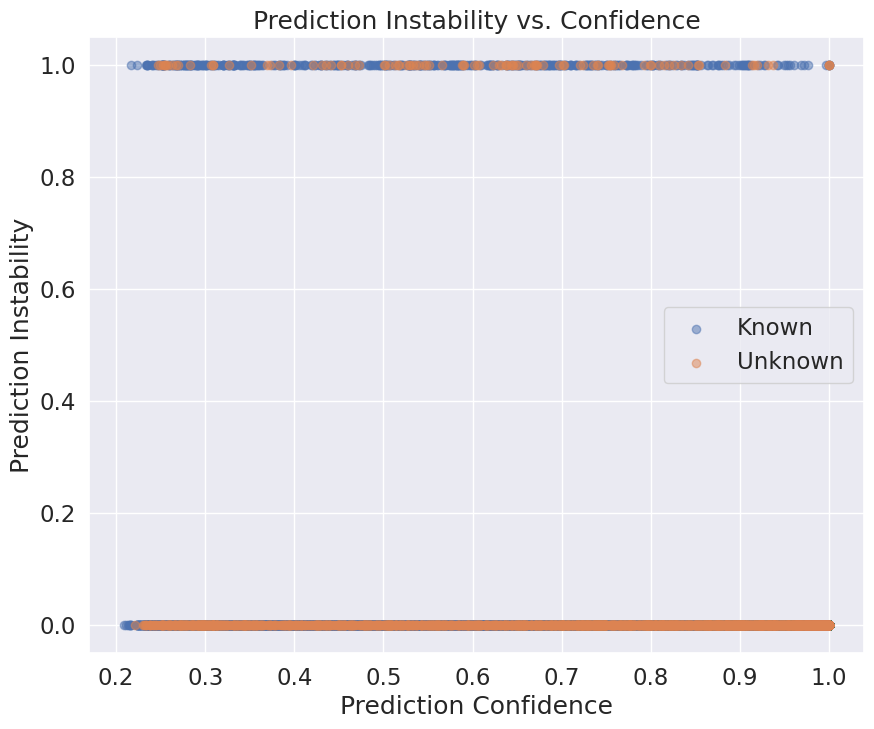

In [46]:
plot_instability_vs_confidence(model,X_train_tensor,X_test_tensor)

In [44]:
def compute_instability_confidence(model, x):
    model.eval()
    with torch.no_grad():
        output = model(x.unsqueeze(0))  # Assuming x is a single sample
        confidence = F.softmax(output, dim=1).max().item()
        instability = instability_check(model, x.unsqueeze(0))  # Assuming your instability_check function returns a value
    return instability, confidence